<a href="https://colab.research.google.com/github/devjaime/data_science_escalab/blob/main/Copia_de_2021_12_21_Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requisitos del dataset

- Debe venir desde una fuente independiente; planilla de cálculo (xlsx), archivo csv, json, etc, o un API pública
- Debe considerar al menos 1000 "filas"
- Debe considerar al menos una columna que represente fecha, fecha y hora, o variaciones de
tiempo.
- Debe considerar al menos una columna con datos categóricos (no ordenables)
- Idealmente debe contener datos perdidos

## Enfoque deseado

1. Plantear preguntas que se desean responder utilizando el dataset
2. Explorar el dataset
3. Comunicar hallazgos y conclusiones

## Acciones requeridas

1. Recuperar datos desde una fuente externa.
2. Crear DataFrame con datos recuperados.
3. Estandarización y limpieza de datos.
4. Completar los datos faltantes o eliminar filas. Cualquiera sea el caso, justificar técnicas utilizada.
5. Análisis exploratorio de datos (tablas, métricas, gráficos, etc).
6. Exportar el dataframe modificado en un formato que pueda ser recuperado posteriormente
7. Comprobar correctitud del dataframe cargado
8. Conclusiones

# Introducción

Describir el problema...

Qué pretende entender o qué preguntas pretende responder con el análisis del dataset?

# Desarrollo

Analisis de curso de udemy dataset

Este conjunto de datos contiene todos los datos de los cursos para todos las personas.
Analizaremos estos datos utilizando la biblioteca de Pandas.
Aquí, las preguntas se dan para la práctica y el propósito de aprendizaje.


# **Introducción**
Alumno Jaime Hernández.
Fecha Enero 2022
### Este analisis de de datos corresponde al registro de cursos de la plataforma udemy a lo largo de la historia hasta el año 2018, se prentende comprobar cantidad de suscriptores y su comportamiento por tipo de curso suscripto.

### Preparar el ambiente

In [68]:
#############################################################
# 0. Preparar el ambiente, importar todo lo que se necesite.
#
# crear funciones (si es el caso)
#############################################################

# importacion de pandas
import pandas as pd

### Ejecución del proyecto

In [69]:
#############################################################
# 1. Recuperar datos desde una fuente externa.
#
#
#############################################################

url = 'https://raw.githubusercontent.com/devjaime/data_science_escalab/main/udemycursos.csv'
udemy_data = pd.read_csv(url, index_col=0)
udemy_data.head()


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [70]:
#############################################################
# 2. Crear DataFrame con datos recuperados.
#
# seleccionar los datos (columnas) que serán utilizados
#############################################################

udemy_data.shape # tamano de la bd 3682, 10 

(3682, 10)

In [71]:
udemy_data.head(10) # verificar los 10 primeros datos cargados

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
1122832,#6 Piano Hand Coordination: Play Open 10 Balla...,True,65,2015,3,21,Intermediate Level,44 mins,2017-03-08T17:53:36Z,Musical Instruments
1123184,#7 Piano Hand Coordination: Play Piano Runs in...,True,65,2015,2,25,Intermediate Level,1 hour,2017-03-08T18:09:32Z,Musical Instruments
768028,* An Integrated Approach to the Fundamentals o...,True,200,134,14,123,All Levels,5.5 hours,2016-03-15T17:23:07Z,Business Finance
206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design


In [72]:
udemy_data.tail(10)  #verificar random ultimas 10 filas, para limpieza de datos


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,
1031698,You Can Play Jazz Saxophone,True,20,37,7,6,Beginner Level,1.5 hours,2017-03-15T16:20:15Z,Musical Instruments
79364,Your Business by the Numbers,True,25,29,2,42,All Levels,3 hours,2013-09-26T14:16:35Z,Business Finance
1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments
551170,Your First Course on Piano,True,70,2002,34,33,Beginner Level,4 hours,2015-07-16T17:07:49Z,Musical Instruments
498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


In [73]:
udemy_data.columns # verificación de columnas existentes y cuales se ocuparan

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'content_duration', 'published_timestamp',
       'subject'],
      dtype='object')

In [74]:
udemy_data.dtypes # verificación de tipos de datos existentes

course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [75]:
udemy_filtrado=udemy_data.drop(['content_duration'],axis=1) # eliminacion de datos no necesarios (no se ocupara la duracion del contenido)
udemy_filtrado


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,published_timestamp,subject
course_id,,,,,,,,,
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,2014-09-18T05:07:05Z,Musical Instruments
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,2017-04-12T19:06:34Z,Musical Instruments
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,2017-04-26T18:34:57Z,Musical Instruments
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,2017-02-21T23:48:18Z,Musical Instruments
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...
328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,2015-04-20T22:15:17Z,Web Development
552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,2015-10-26T20:04:21Z,Musical Instruments
631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,2015-11-11T18:55:45Z,Web Development


In [76]:
#############################################################
# 3. Estandarización y limpieza de datos.
#
# cambiar nombres de variables (columnas)
# seleccionar índices (de ser necesario)
#############################################################
udemy_filtrado.isnull().any() # limpiar nulos

course_title           False
is_paid                False
price                  False
num_subscribers        False
num_reviews            False
num_lectures           False
level                  False
published_timestamp    False
subject                False
dtype: bool

In [77]:
udemy_filtrado.fillna(2, inplace=False) # reemplazar nulos de valor paid a False

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,published_timestamp,subject
course_id,,,,,,,,,
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,2014-09-18T05:07:05Z,Musical Instruments
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,2017-04-12T19:06:34Z,Musical Instruments
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,2017-04-26T18:34:57Z,Musical Instruments
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,2017-02-21T23:48:18Z,Musical Instruments
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...
328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,2015-04-20T22:15:17Z,Web Development
552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,2015-10-26T20:04:21Z,Musical Instruments
631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,2015-11-11T18:55:45Z,Web Development


In [78]:
udemy_filtrado.rename(columns={'course_id	':'Id_curso'}, inplace = True)
udemy_filtrado.rename(columns={'course_title':'Titulo_curso'},inplace = True)
udemy_filtrado.rename(columns={'is_paid':'Pagado'},inplace = True)
udemy_filtrado.rename(columns={'price':'Precio'},inplace = True)
udemy_filtrado.rename(columns={'num_subscribers':'Cantidad_suscriptores'},inplace = True)
udemy_filtrado.rename(columns={'num_reviews':'Cantidad_comentarios'},inplace = True)
udemy_filtrado.rename(columns={'num_lectures':'Cantidad_lecturas'},inplace = True)
udemy_filtrado.rename(columns={'level':'Nivel'},inplace = True)
udemy_filtrado.rename(columns={'published_timestamp	':'Fecha_publicacion'},inplace = True)
udemy_filtrado.rename(columns={'subject':'Categoria'},inplace = True)


In [79]:
udemy_filtrado

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria
course_id,,,,,,,,,
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,2014-09-18T05:07:05Z,Musical Instruments
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,2017-04-12T19:06:34Z,Musical Instruments
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,2017-04-26T18:34:57Z,Musical Instruments
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,2017-02-21T23:48:18Z,Musical Instruments
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...
328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,2015-04-20T22:15:17Z,Web Development
552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,2015-10-26T20:04:21Z,Musical Instruments
631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,2015-11-11T18:55:45Z,Web Development


In [80]:
#############################################################
# 4. Completar los datos faltantes o eliminar filas. Cualquiera sea el caso, justificar técnicas utilizada.
#
# elimina o reemplaza datos faltantes
# transformación de datos
# se recupera formato de fecha en columna o se hace el tratamiento de las fechas
#############################################################

# ¿Cuáles son todas las Categorias diferentes para las que Udemy ofrece cursos?
udemy_filtrado.Categoria.unique()


array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [81]:
#############################################################
# 5. Análisis exploratorio de datos (tablas, métricas, gráficos, etc).
# Aquí se explica lo que se observa en los gráficos, métricas, tablas, etc
# se hace el análisis de los datos detallando lo que se observa y conlusiones que se pueden obtener
# 
# tratamiento de datos atípicos "outlier"
# normalización
# balancear dataset
# unión o separación de datos
#############################################################
# ¿Qué asignatura tiene el número máximo de cursos?
udemy_filtrado.Categoria.value_counts()


Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: Categoria, dtype: int64

In [82]:
# Mostrar todos los cursos que son gratuitos.
udemy_filtrado[udemy_filtrado.Pagado == False]


,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria
course_id,,,,,,,,,
286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,2014-08-23T05:08:14Z,Musical Instruments
696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,2015-12-21T18:50:50Z,Musical Instruments
955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2016-09-13T21:51:59Z,Musical Instruments
270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,2014-08-10T20:19:10Z,Web Development
1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,2017-05-30T14:30:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...
552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,2015-07-15T00:21:56Z,Web Development
1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2017-01-18T17:01:40Z,Web Development
752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,2016-03-03T17:45:31Z,Web Development


In [83]:
# Mostrar todos los cursos que son Pagados.
udemy_filtrado[udemy_filtrado.Pagado == True]

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria
course_id,,,,,,,,,
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,2014-09-18T05:07:05Z,Musical Instruments
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,2017-04-12T19:06:34Z,Musical Instruments
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,2017-04-26T18:34:57Z,Musical Instruments
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,2017-02-21T23:48:18Z,Musical Instruments
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...
498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2015-05-26T20:48:48Z,Business Finance
328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,2015-04-20T22:15:17Z,Web Development
552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,2015-10-26T20:04:21Z,Musical Instruments


In [84]:
# ¿Ranking de cursos con mayor cantidad de suscriptores?
udemy_filtrado.sort_values('Cantidad_suscriptores', ascending=False)

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria
course_id,,,,,,,,,
41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,2013-02-14T07:03:41Z,Web Development
59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,2013-06-09T15:51:55Z,Web Development
625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,2015-11-02T21:13:27Z,Web Development
173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,2014-04-08T16:21:30Z,Web Development
764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,2016-03-08T22:28:36Z,Web Development
...,...,...,...,...,...,...,...,...,...
1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,2017-05-22T17:14:43Z,Musical Instruments
1258666,Financial Statement Auditing Cycles,True,50,0,0,9,Intermediate Level,2017-06-29T23:20:10Z,Business Finance
1215926,Kickstarter success in 5 easy steps,True,20,0,0,12,All Levels,2017-05-16T14:55:28Z,Business Finance


In [85]:
#¿Cuáles son los cursos con menor cantidad de suscriptores? 
udemy_filtrado.sort_values('Cantidad_suscriptores')

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria
course_id,,,,,,,,,
1233314,Building a Balanced Scorecard,True,50,0,0,11,Intermediate Level,2017-07-03T21:38:22Z,Business Finance
1232282,The Cash Flow Statement - An Introduction,True,50,0,0,10,Beginner Level,2017-06-28T16:05:51Z,Business Finance
1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2017-07-03T17:39:57Z,Graphic Design
726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,2016-01-18T17:56:36Z,Graphic Design
715476,The Cuckoo Strategy to get European Funding,True,160,0,0,6,All Levels,2016-01-06T02:38:23Z,Business Finance
...,...,...,...,...,...,...,...,...,...
764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,2016-03-08T22:28:36Z,Web Development
173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,2014-04-08T16:21:30Z,Web Development
625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,2015-11-02T21:13:27Z,Web Development


In [86]:
# Mostrar todos los cursos de Desarrollo Web donde el precio sea inferior a 200
udemy_filtrado[(udemy_filtrado.Categoria == 'Web Development') & (udemy_filtrado.Precio < '200')]

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria
course_id,,,,,,,,,
64605,1 Hour CSS,True,100,18324,333,16,Beginner Level,2013-07-09T20:27:14Z,Web Development
72262,1 hour jQuery,True,100,5456,133,25,Beginner Level,2013-08-03T14:20:52Z,Web Development
975916,17 Complete JavaScript projects explained st...,True,185,327,26,106,Beginner Level,2016-10-26T14:03:38Z,Web Development
665042,8 Beautiful Ruby on Rails Apps in 30 Days & TD...,True,100,5962,466,132,All Levels,2016-03-08T07:36:40Z,Web Development
281690,A Very Complete Introduction To Laravel,True,20,2320,114,43,All Levels,2014-08-24T16:47:54Z,Web Development
...,...,...,...,...,...,...,...,...,...
512000,WordPress Theme Academy with Bootstrap,True,20,1169,110,64,Intermediate Level,2015-09-10T00:48:11Z,Web Development
1211800,Wordpress Theme Development for Beginners,True,20,1052,14,47,All Levels,2017-05-17T22:55:23Z,Web Development
440006,X theme for WordPress: Responsive web design w...,True,20,1318,81,55,All Levels,2015-03-22T22:46:36Z,Web Development


In [87]:
# Listado de todos los cursos relacionados con Python
udemy_filtrado[udemy_filtrado.Titulo_curso.str.contains('Python')]

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria
course_id,,,,,,,,,
599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,2016-08-11T22:09:24Z,Web Development
47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,2013-04-08T00:46:14Z,Web Development
631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,2015-11-08T20:57:35Z,Web Development
186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,2014-05-29T00:58:43Z,Web Development
394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2015-06-09T19:51:50Z,Web Development
1038538,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,2016-12-22T00:11:22Z,Web Development
902888,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,2016-07-13T21:40:32Z,Business Finance
391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,2015-02-09T15:37:56Z,Web Development
1063722,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2017-01-18T21:53:34Z,Web Development


In [88]:
# Caules cursos fueron publicados en el año 2017
#converte a tipo datos datetime
udemy_filtrado['published_timestamp'] = pd.to_datetime(udemy_filtrado.published_timestamp)


In [89]:
udemy_filtrado.dtypes #verifico el campo fecha este correcto

Titulo_curso                          object
Pagado                                  bool
Precio                                object
Cantidad_suscriptores                  int64
Cantidad_comentarios                   int64
Cantidad_lecturas                      int64
Nivel                                 object
published_timestamp      datetime64[ns, UTC]
Categoria                             object
dtype: object

In [90]:
udemy_filtrado['Año'] = udemy_filtrado['published_timestamp'].dt.year #Creo el año de publicacion por la fecha de publicacion

In [91]:
udemy_filtrado

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria,Año
course_id,,,,,,,,,,
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,2017-04-12 19:06:34+00:00,Musical Instruments,2017
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,2017-04-26 18:34:57+00:00,Musical Instruments,2017
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,2017-02-21 23:48:18+00:00,Musical Instruments,2017
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,2017-02-21 23:44:49+00:00,Musical Instruments,2017
...,...,...,...,...,...,...,...,...,...,...
328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,2015-04-20 22:15:17+00:00,Web Development,2015
552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,2015-10-26 20:04:21+00:00,Musical Instruments,2015
631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,2015-11-11 18:55:45+00:00,Web Development,2015


In [98]:
udemy_filtrado[udemy_filtrado.Año == 2017]

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria,Año
course_id,,,,,,,,,,
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,2017-04-12 19:06:34+00:00,Musical Instruments,2017
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,2017-04-26 18:34:57+00:00,Musical Instruments,2017
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,2017-02-21 23:48:18+00:00,Musical Instruments,2017
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,2017-02-21 23:44:49+00:00,Musical Instruments,2017
1122832,#6 Piano Hand Coordination: Play Open 10 Balla...,True,65,2015,3,21,Intermediate Level,2017-03-08 17:53:36+00:00,Musical Instruments,2017
...,...,...,...,...,...,...,...,...,...,...
1115132,XML XQuery - Crash Course for Beginners,True,45,426,4,10,All Levels,2017-02-19 22:52:36+00:00,Web Development,2017
1115126,XML XSLT - Crash Course for Beginners,True,45,426,4,9,All Levels,2017-02-19 18:11:07+00:00,Web Development,2017
1031698,You Can Play Jazz Saxophone,True,20,37,7,6,Beginner Level,2017-03-15 16:20:15+00:00,Musical Instruments,2017


In [99]:
#¿Cuál es el número máximo de suscriptores para cada nivel?
udemy_filtrado.Nivel.unique()



array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [101]:
udemy_filtrado.groupby('Nivel')['Cantidad_suscriptores'].max() 

Nivel
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: Cantidad_suscriptores, dtype: int64

In [102]:
udemy_filtrado.groupby('Nivel').max() 

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,published_timestamp,Categoria,Año
Nivel,,,,,,,,,
All Levels,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,True,Free,268923,27445,544,2017-07-06 21:16:13+00:00,Web Development,2017
Beginner Level,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,True,Free,161029,5924,779,2017-07-06 21:46:30+00:00,Web Development,2017
Expert Level,[Value Investing] Where White People Keep Thei...,True,95,5172,249,157,2017-07-04 18:08:01+00:00,Web Development,2017
Intermediate Level,株式投資で本当のテクニカル分析ができるようになる,True,Free,29167,3326,320,2017-07-05 04:41:54+00:00,Web Development,2017


In [110]:
#############################################################
# 6. Exportar el dataframe modificado en un formato que pueda ser recuperado posteriormente
#
# salvar el dataframe en un archivo puede ser serializado, json, csv o cualquier otro
#############################################################

udemy_filtrado.to_json('udemy_analisis.json', orient = 'split', compression = 'infer', index = 'true')
udemy_filtrado.to_csv('udemy_analisis.csv',index=False)


In [114]:
#############################################################
# 7. Comprobar correctitud del dataframe cargado
#
# Lectura y uso del archivo generado, verificar que se pueden leer los valores, graficar algunos
#############################################################

df = pd.read_json('udemy_analisis.json', orient ='split', compression = 'infer')


In [115]:
df.head()

,Titulo_curso,Pagado,Precio,Cantidad_suscriptores,Cantidad_comentarios,Cantidad_lecturas,Nivel,published_timestamp,Categoria,Año
288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1411016825000,Musical Instruments,2014
1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1492023994000,Musical Instruments,2017
1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1493231697000,Musical Instruments,2017
1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1487720898000,Musical Instruments,2017
1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,1487720689000,Musical Instruments,2017


In [116]:
df.shape # tamano de la bd 3682, 10 

(3682, 10)

In [117]:
udemy_filtrado.dtypes #verifico el campo fecha este correcto

Titulo_curso                          object
Pagado                                  bool
Precio                                object
Cantidad_suscriptores                  int64
Cantidad_comentarios                   int64
Cantidad_lecturas                      int64
Nivel                                 object
published_timestamp      datetime64[ns, UTC]
Categoria                             object
Año                                    int64
dtype: object

In [119]:
import matplotlib.pyplot as plt # importo libreria grafica


In [ ]:
udemy_filtrado.dtypes #verifico el campo fecha este correcto

Titulo_curso                          object
Pagado                                  bool
Precio                                object
Cantidad_suscriptores                  int64
Cantidad_comentarios                   int64
Cantidad_lecturas                      int64
Nivel                                 object
published_timestamp      datetime64[ns, UTC]
Categoria                             object
Año                                    int64
dtype: object

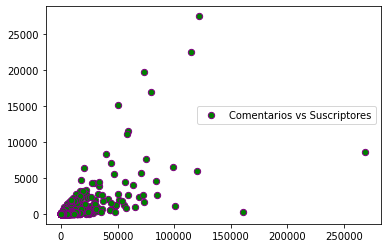

In [129]:
plt.scatter(udemy_filtrado.Cantidad_suscriptores, udemy_filtrado['Cantidad_comentarios'], color = 'g', s=40, edgecolor = 'purple', label ='Comentarios vs Suscriptores')
plt.legend()

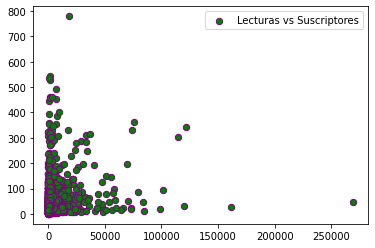

In [132]:
plt.scatter(udemy_filtrado.Cantidad_suscriptores, udemy_filtrado['Cantidad_lecturas'], color = 'g', s=40, edgecolor = 'purple', label ='Lecturas vs Suscriptores')
plt.legend()

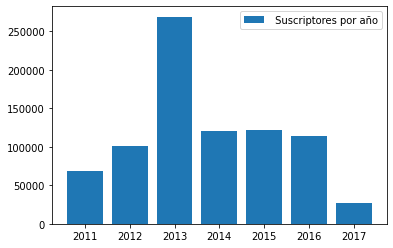

In [140]:
plt.bar(udemy_filtrado.Año, udemy_filtrado.Cantidad_suscriptores,label =' Suscriptores por año' )
plt.legend()

([<matplotlib.patches.Wedge at 0x7f1813ed1f90>,
 [Text(0.5728667005950069, 0.9390547073250796, 'Musical Instruments'),
  Text(-0.9194756692703207, 0.6037917634581444, 'Business Finance'),
  Text(-0.9580555659882656, -0.5404900854584701, 'Graphic Design'),
  Text(0.5720651833507825, -0.93954320070864, 'Web Development')])

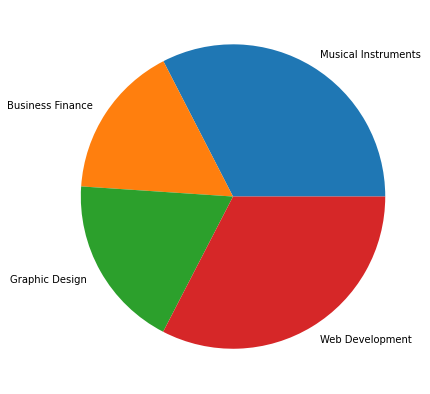

In [157]:
# Porcentaje por categoria

categoria= udemy_filtrado.Categoria.unique()
data=df.groupby('Categoria').size()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = categoria)

([<matplotlib.patches.Wedge at 0x7f1814063890>,
 [Text(-0.085322523434453, 1.0966859472952033, 'All Levels'),
  Text(-0.35754320335946904, -1.0402705694825023, 'Intermediate Level'),
  Text(0.7913027000549914, -0.7640942591628866, 'Beginner Level'),
  Text(1.029792353294583, -0.386688128982524, 'Expert Level')])

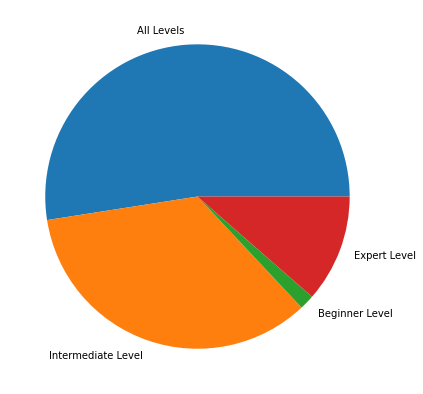

In [158]:
# Porcentaje por nivel
categoria= udemy_filtrado.Nivel.unique()
data=df.groupby('Nivel').size()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = categoria)

# Conlusiones
...


1.   Los comentarios afectan en menor medida que las lecturas a los suscriptores de los cursos
2.   El año 2013 fue la mayor cantidad de suscriptores a cursos
3. Sorprendentemente los cursos de musica son los que mas se suscribe la gente
4. La gente prefiere los cursos que abarcan todos los niveles (de nivel basico a experto) que cursos que sean de un nivel en especifico



